In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [2]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')

In [4]:
test=pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')

In [5]:
#reading the data
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [6]:
#finding the shape of the data
train.shape

(58645, 13)

In [7]:
#summary statistics of the data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58645.0,29322.000000,16929.497605,0.00,14661.00,29322.00,43983.00,58644.00
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106978,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


In [8]:
#looking at our datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [9]:
#checking for missing values
pd.DataFrame(data={'% of Missing Values':round(train.isna().sum()/train.isna().count()*100,2)})

,% of Missing Values
id,0.0
person_age,0.0
person_income,0.0
person_home_ownership,0.0
person_emp_length,0.0
loan_intent,0.0
loan_grade,0.0
loan_amnt,0.0
loan_int_rate,0.0
loan_percent_income,0.0


we have a complete data set with no missing values

In [10]:
#looking at the number of unique values
train.nunique()

id                            58645
person_age                       53
person_income                  2641
person_home_ownership             4
person_emp_length                36
loan_intent                       6
loan_grade                        7
loan_amnt                       545
loan_int_rate                   362
loan_percent_income              61
cb_person_default_on_file         2
cb_person_cred_hist_length       29
loan_status                       2
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [12]:
#Creating a list of columns (for use when evaluating our model)
str_values = test.select_dtypes(include=['object']).columns.tolist()
num_values = test.select_dtypes(include=['number']).columns.tolist()
num_values

['id',
 'person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [13]:
# Making a list of all catrgorical variables
cat_col=['person_home_ownership', 'loan_intent','loan_grade', 'cb_person_default_on_file']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(train[column].value_counts())
    print('-'*50)

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64
--------------------------------------------------
loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64
--------------------------------------------------
loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64
--------------------------------------------------
cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64
--------------------------------------------------


In [14]:
#copying the data
train_copy=train.copy()
test_copy=test.copy()

# **Exploratory Data Analysis**

In [15]:
# Defining the hist_box() function
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

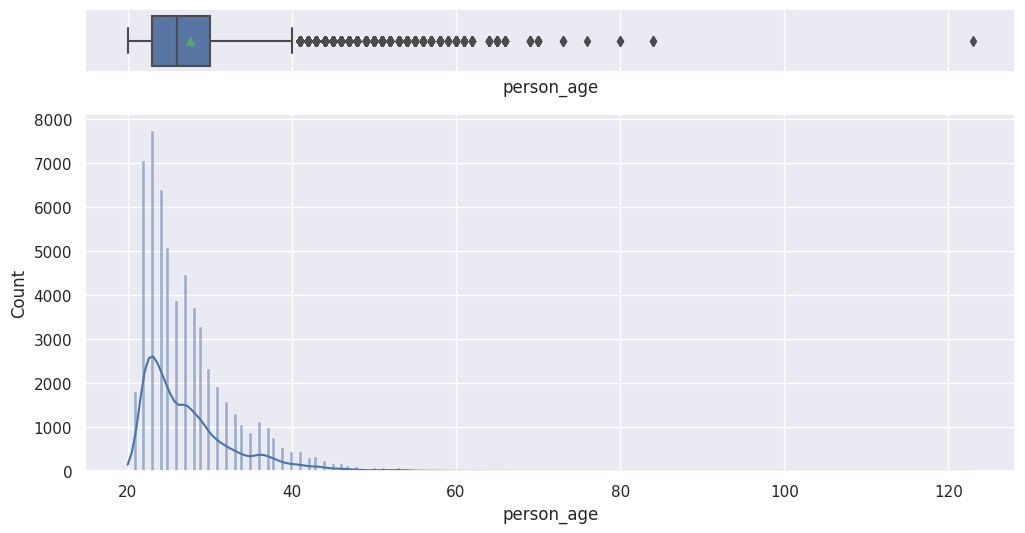

In [16]:
hist_box(train, 'person_age')

a significant right skew in our data with a probable outlier at 120+ years old

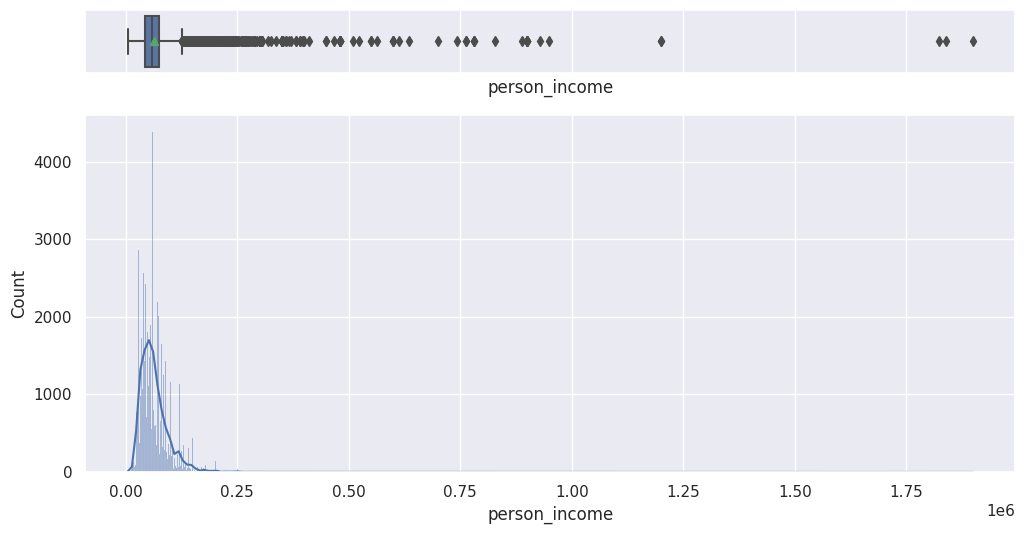

In [17]:
hist_box(train, 'person_income')

once again, a heavy right skewed variable with a few outliers showing extreme levels of personal wealth

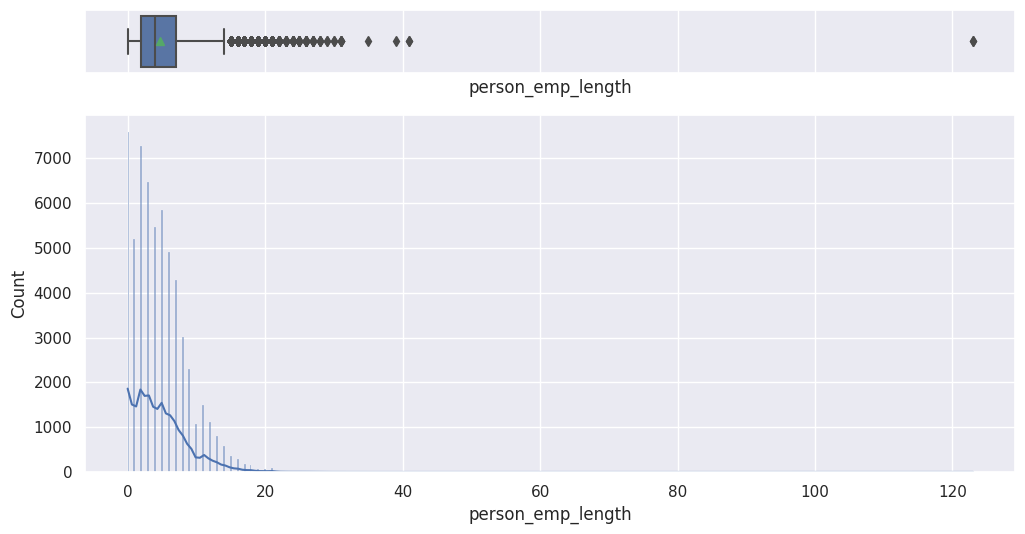

In [18]:
hist_box(train, 'person_emp_length')

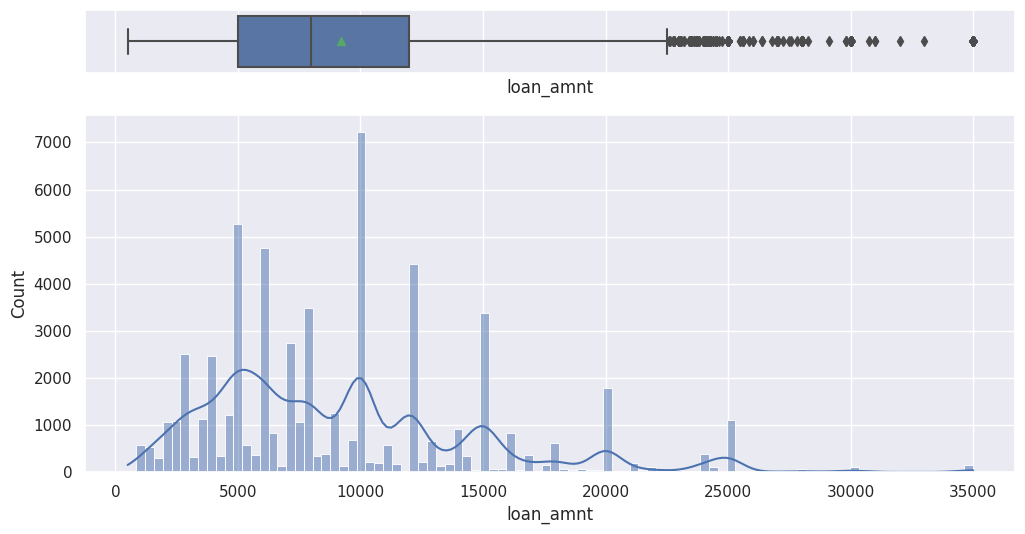

In [19]:
hist_box(train, 'loan_amnt')

the loan amount has a slightly more normal distribution, with a rather long right tail representing high loan amounts

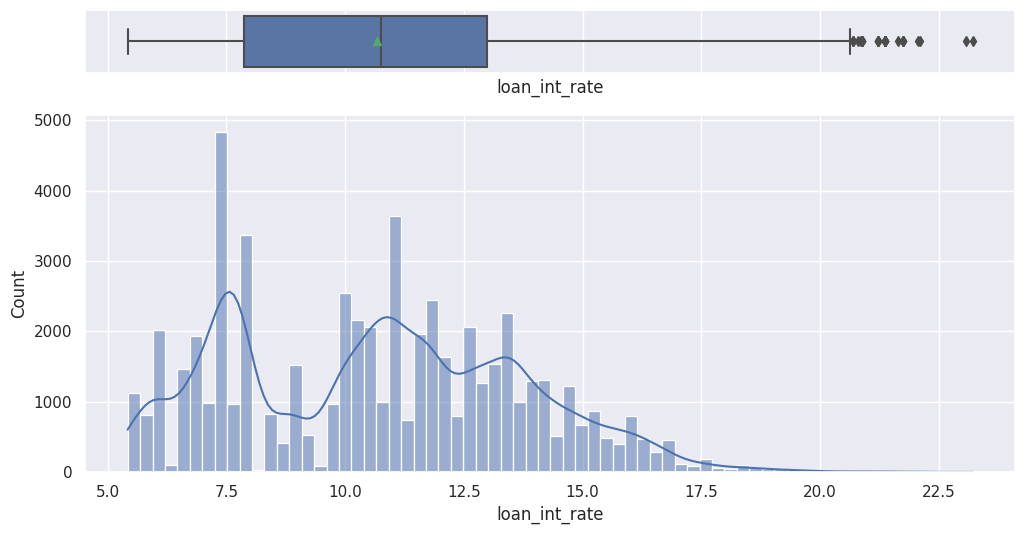

In [20]:
hist_box(train, 'loan_int_rate')

Loan rate has a similar distribution to loan amount

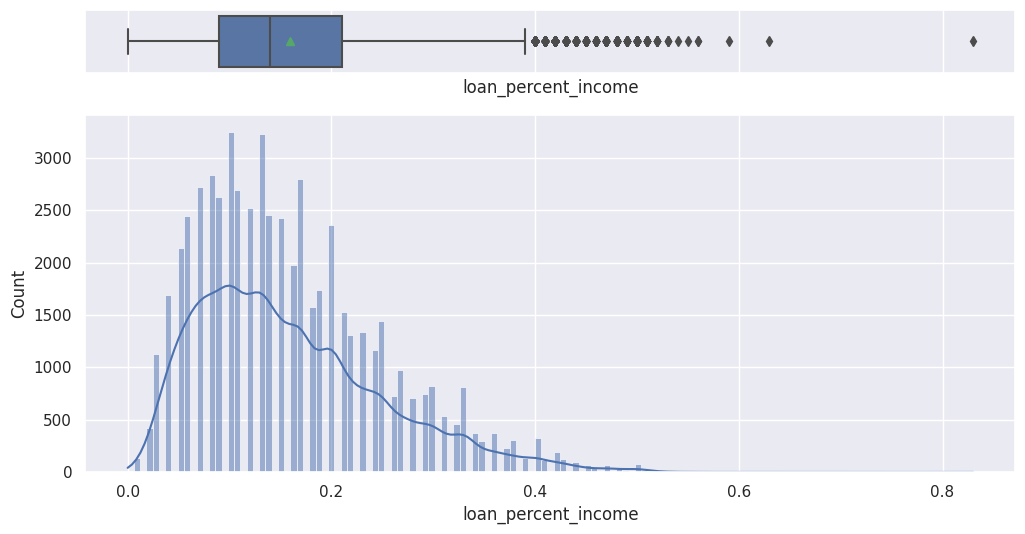

In [21]:
hist_box(train, 'loan_percent_income')

similar to above, we have a relatively normal distribution with a handful of outliers providing some right skewness.

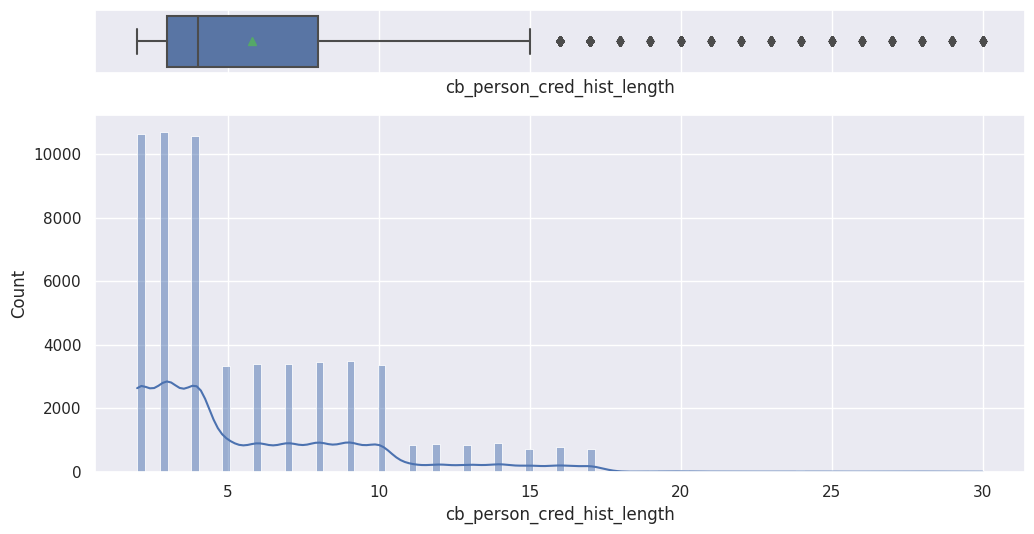

In [22]:
hist_box(train, 'cb_person_cred_hist_length')

In [23]:
train[train['person_age']>120]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
47336,47336,123,36000,MORTGAGE,7.0,PERSONAL,B,6700,10.75,0.18,N,4,0


In [24]:
train[train['person_emp_length']>120]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
41079,41079,28,60350,MORTGAGE,123.0,MEDICAL,D,25000,15.95,0.35,Y,6,1
49252,49252,21,192000,MORTGAGE,123.0,VENTURE,B,20000,11.49,0.10,N,2,0


In [25]:
# Dropping observaions with age greater than 40. 
train.drop(index=train[train.person_age>120].index,inplace=True)

# Dropping observation with employment length greater than 120. 
train.drop(index=train[train.person_emp_length>120].index,inplace=True)



Looking at the categorical variables

In [26]:
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)
    tab.plot(kind='bar', stacked=True, figsize=(count+1, 5))
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), frameon=True)
    plt.show()

loan_status                0     1    All
person_home_ownership                    
All                    50293  8349  58642
RENT                   23785  6809  30594
MORTGAGE               23339  1482  24821
OWN                     3095    43   3138
OTHER                     74    15     89


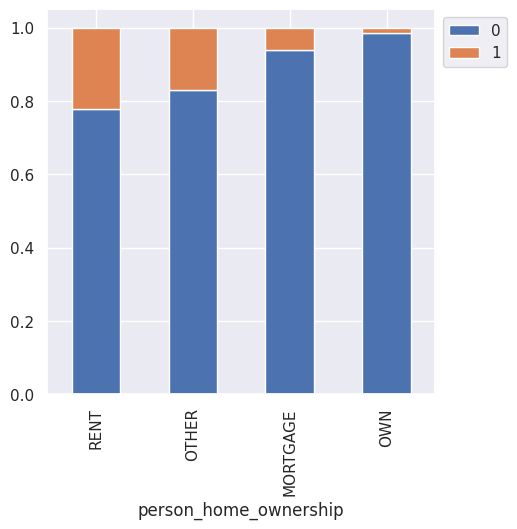

In [27]:
stacked_barplot(train,'person_home_ownership','loan_status')

loan_status            0     1    All
loan_intent                          
All                50293  8349  58642
MEDICAL             8985  1948  10933
DEBTCONSOLIDATION   7404  1729   9133
PERSONAL            8685  1330  10015
EDUCATION          10949  1322  12271
HOMEIMPROVEMENT     5189  1091   6280
VENTURE             9081   929  10010


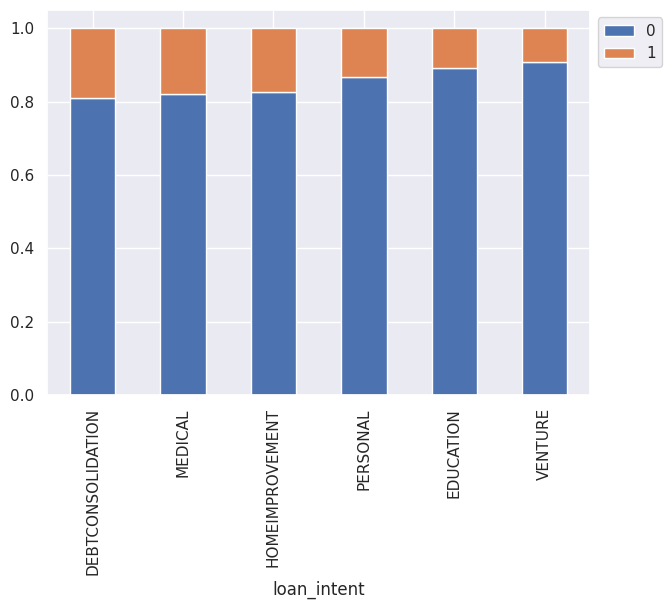

In [28]:
stacked_barplot(train,'loan_intent','loan_status')

debt consolidation has the highest proportion of loan approvals.

loan_status      0     1    All
loan_grade                     
All          50293  8349  58642
D             2046  2987   5033
B            18311  2087  20398
C             9542  1494  11036
A            19952  1032  20984
E              378   631   1009
F               58    91    149
G                6    27     33


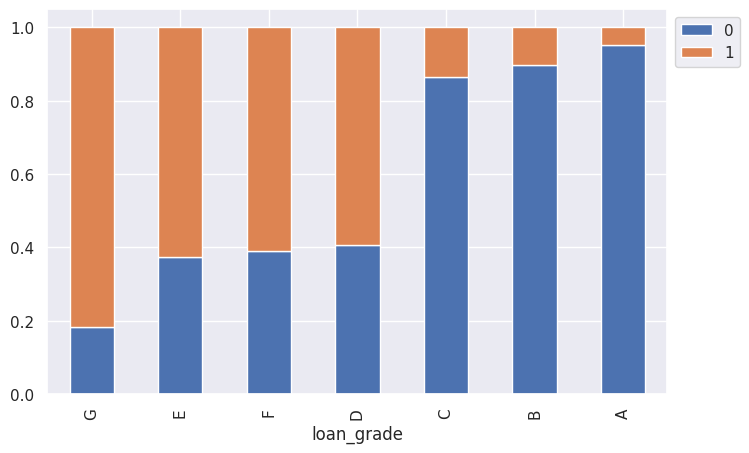

In [29]:
stacked_barplot(train,'loan_grade','loan_status')

As can be expected, lower grade loans have a higher approval rate.  This makes sense as they typically have less stringent credit requirements

loan_status                    0     1    All
cb_person_default_on_file                    
All                        50293  8349  58642
N                          44192  5749  49941
Y                           6101  2600   8701


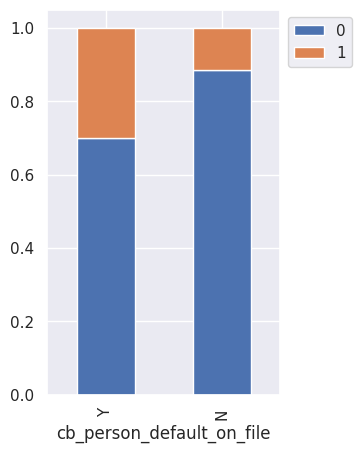

In [30]:
stacked_barplot(train,'cb_person_default_on_file','loan_status')

A bit unexpected, but the data illustrates if a person has defaulted on a loan in the past, they have a higher approval proportion relative to those who have not had a default.

Evaluating any correlations within the data

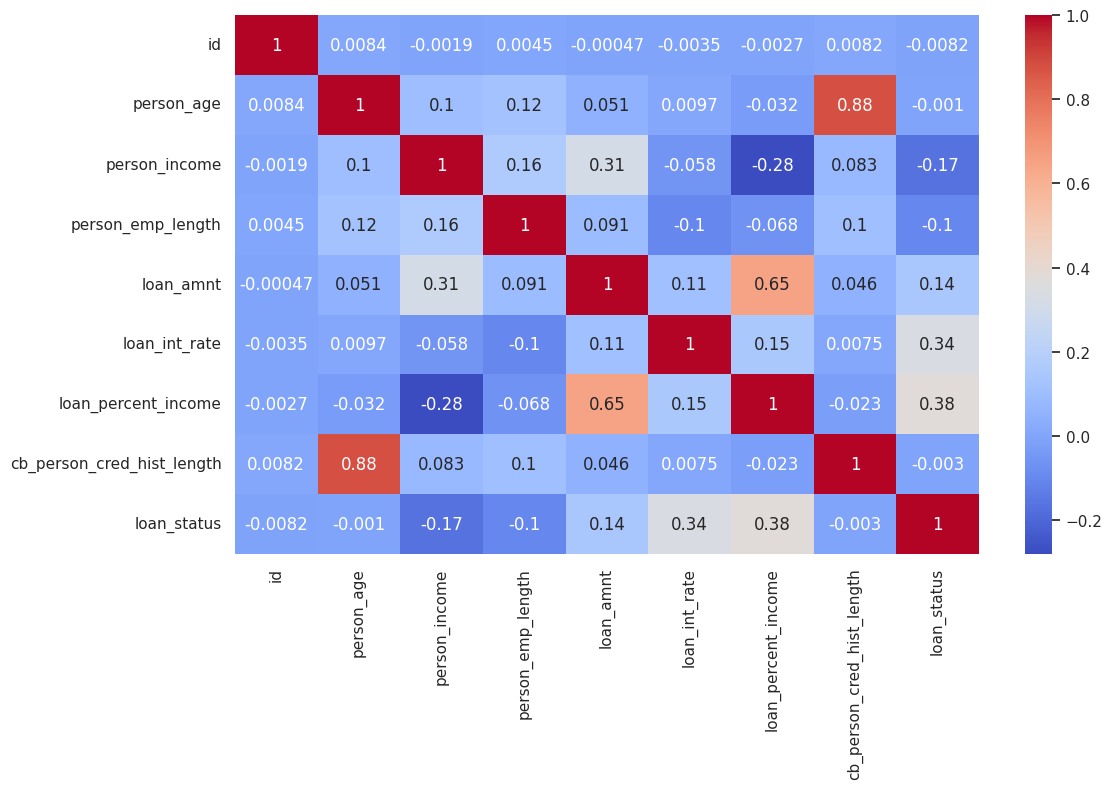

In [31]:
cols_list = train.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(train[cols_list].corr(), annot=True, cmap='coolwarm')
plt.show()

We see that a persons credit history and their age are highly correlated.
We can contrast that with the negative correlation of the loan percent income to personal income.

# **Lets prepare the data for modeling**

In [32]:
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

def converting_datatypes(df, cat_cols, df_train=False):
    
    for col in cat_cols:
        df[col] = df[col].astype('category')
    
    df['person_age'] = df['person_age'].astype('int32')
    df['cb_person_cred_hist_length'] = df['cb_person_cred_hist_length'].astype('int32') 
    return df
        
train = converting_datatypes(train, cat_cols ,df_train=True)


In [33]:
#List of columns to create a dummy variables
col_dummy=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

In [34]:
# Separating target variable and other variables
X=train.drop(columns='loan_status')
Y=train['loan_status']

In [35]:
# Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

In [36]:
#Encoding categorical varaibles
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

In [37]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

id                             0
person_age                     0
person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
loan_grade_B                   0
loan_grade_C                   0
loan_grade_D                   0
loan_grade_E                   0
loan_grade_F                   0
loan_grade_G                   0
cb_person_default_on_file_Y    0
dtype: int64
------------------------------
id                             0
person_age                     0
person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0

# **Model 1 - Decision Tree**

Model cases:

-customer predicted not to be approved, but would be approved = loss of customer (A)

-customer predicted to be approved, but would not be approved = loss of resources (B)

(A) is the worst case (False Negative), and therefore our models need to prioritize maximizing Recall

In [38]:
#Creating our functions to calculate model metrics
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ['Not Approved', 'Approved'], yticklabels = ['Not Approved', 'Approved'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [39]:
#Building our Decision Tree
dt_class=DecisionTreeClassifier(random_state=1)
dt_class.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35205
           1       1.00      1.00      1.00      5844

    accuracy                           1.00     41049
   macro avg       1.00      1.00      1.00     41049
weighted avg       1.00      1.00      1.00     41049



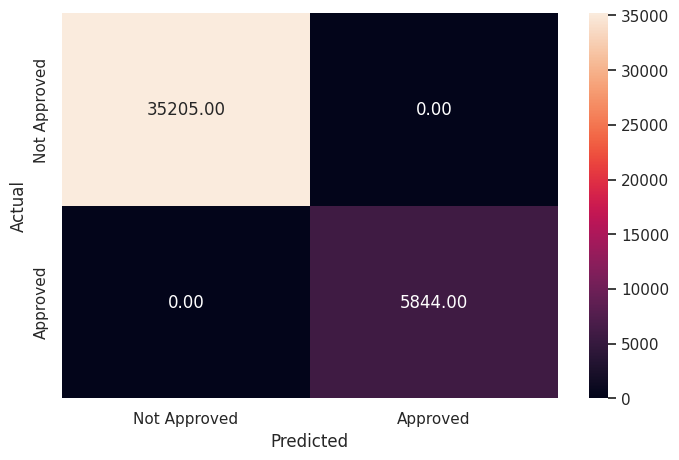

In [40]:
#Checking our tree against our training data
dt_class_train = dt_class.predict(X_train)
metrics_score(y_train, dt_class_train)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     15088
           1       0.70      0.72      0.71      2505

    accuracy                           0.92     17593
   macro avg       0.82      0.83      0.83     17593
weighted avg       0.92      0.92      0.92     17593



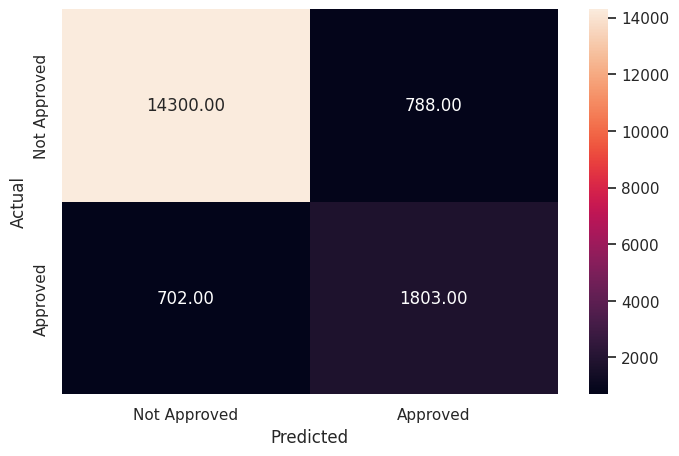

In [41]:
#Checking our Tree against our test data
dt_class_test = dt_class.predict(X_test)
metrics_score(y_test, dt_class_test)

our Decision Tree is heavily overfitting to our training set

In [42]:
#Tune the tree using GridSearchCV
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall', n_jobs= -1 )
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     35205
           1       0.72      0.66      0.69      5844

    accuracy                           0.92     41049
   macro avg       0.83      0.81      0.82     41049
weighted avg       0.91      0.92      0.91     41049



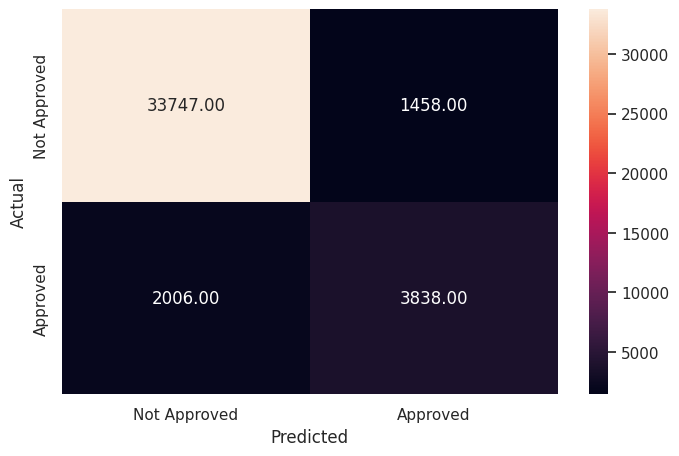

In [43]:
#checking the tuned tree on the training set
dt_tuned_train = estimator.predict(X_train)
metrics_score(y_train, dt_tuned_train)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     15088
           1       0.73      0.65      0.69      2505

    accuracy                           0.92     17593
   macro avg       0.84      0.81      0.82     17593
weighted avg       0.91      0.92      0.91     17593



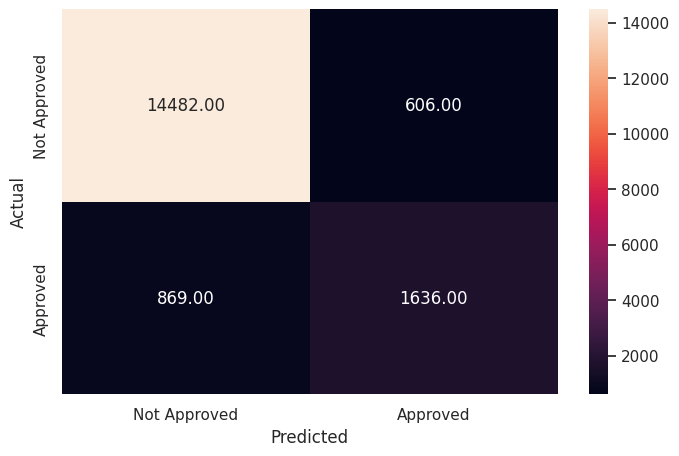

In [44]:
#checking the tuned tree on the test set
dt_tuned_test = estimator.predict(X_test)
metrics_score(y_test, dt_tuned_test)

Accuracy has remained the same, but our Recall has dropped.

# **Model 2: Random Forest**

In [45]:
#Building our Random Forest
rf_class=RandomForestClassifier(random_state=1)
rf_class.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35205
           1       1.00      1.00      1.00      5844

    accuracy                           1.00     41049
   macro avg       1.00      1.00      1.00     41049
weighted avg       1.00      1.00      1.00     41049



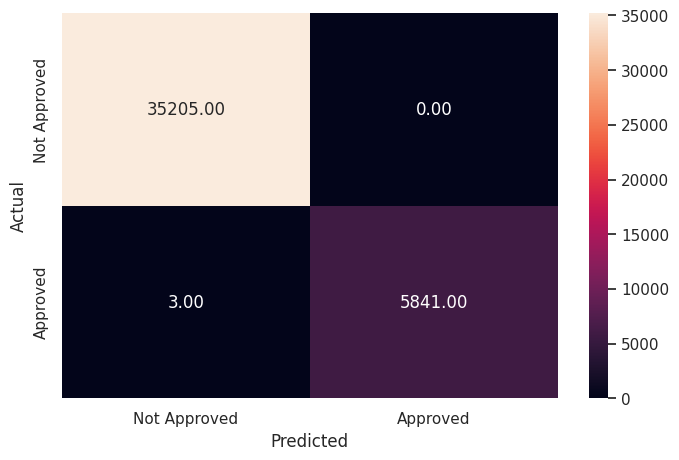

In [46]:
rf_class_train=rf_class.predict(X_train)
metrics_score(y_train, rf_class_train)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15088
           1       0.93      0.70      0.80      2505

    accuracy                           0.95     17593
   macro avg       0.94      0.85      0.89     17593
weighted avg       0.95      0.95      0.95     17593



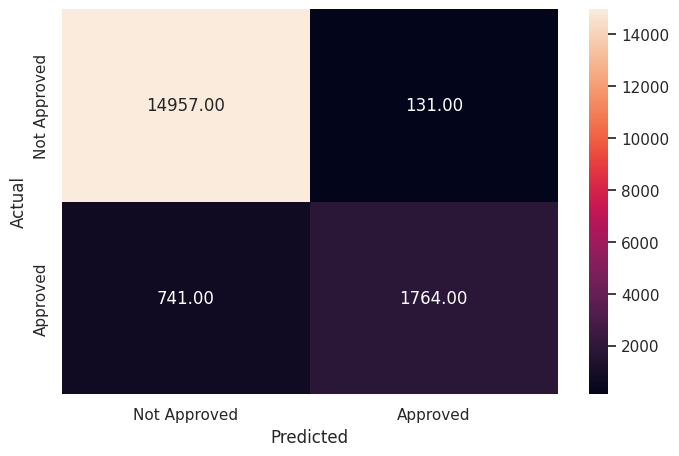

In [47]:
rf_class_test=rf_class.predict(X_test)
metrics_score(y_test, rf_class_test)

accuracy is high, but the model is still favoring precision over recall

In [48]:
from sklearn import metrics

In [49]:
#Tuning our RF using Gridsearch
rf_class_tuned = RandomForestClassifier(criterion = "entropy", random_state = 1)
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
}
scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(rf_class_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_fit = grid_obj
grid_fit.fit(X_train, y_train)
rf_class_tuned = grid_fit.best_estimator_
rf_class_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=1)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     35205
           1       0.72      0.78      0.75      5844

    accuracy                           0.93     41049
   macro avg       0.84      0.86      0.85     41049
weighted avg       0.93      0.93      0.93     41049



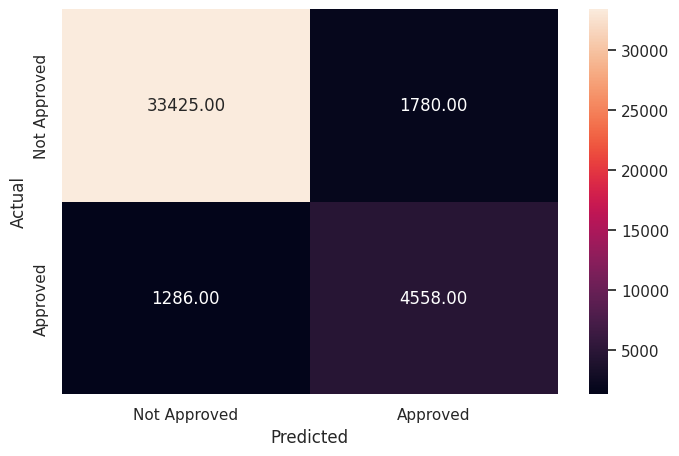

In [50]:
rf_class_tuned_train=rf_class_tuned.predict(X_train)
metrics_score(y_train, rf_class_tuned_train)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     15088
           1       0.72      0.77      0.75      2505

    accuracy                           0.92     17593
   macro avg       0.84      0.86      0.85     17593
weighted avg       0.93      0.92      0.93     17593



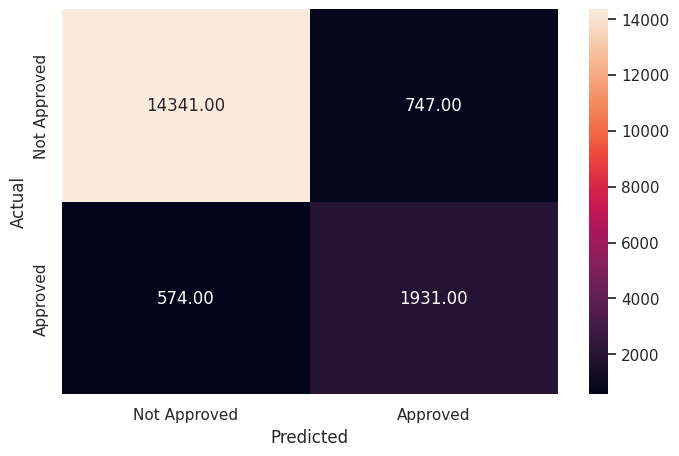

In [51]:
rf_class_tuned_test=rf_class_tuned.predict(X_test)
metrics_score(y_test, rf_class_tuned_test)

with our tuned RF, our Recall has increased considerably, and accuracy of the model remains the same.

# **Model 3: Linear SVM**

In [52]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [53]:
#linear kernel SVM
svm = SVC(kernel="linear",probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X=X_train_scaled, y=y_train)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     35205
           1       0.78      0.52      0.63      5844

    accuracy                           0.91     41049
   macro avg       0.85      0.75      0.79     41049
weighted avg       0.90      0.91      0.90     41049



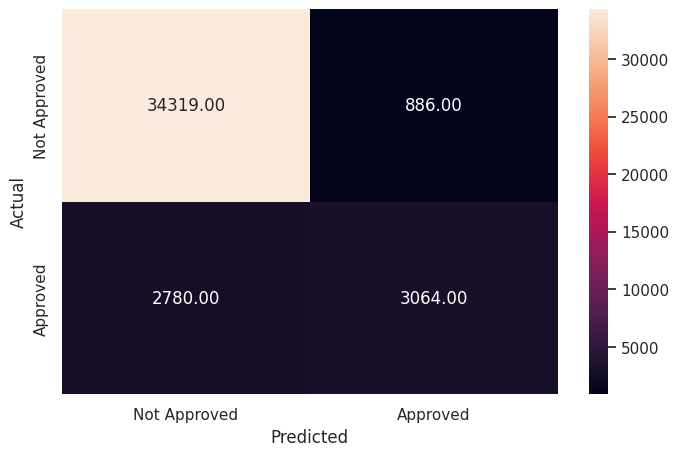

In [54]:
svm_train = model.predict(X_train_scaled)
metrics_score(y_train, svm_train)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     15088
           1       0.78      0.52      0.62      2505

    accuracy                           0.91     17593
   macro avg       0.85      0.75      0.79     17593
weighted avg       0.90      0.91      0.90     17593



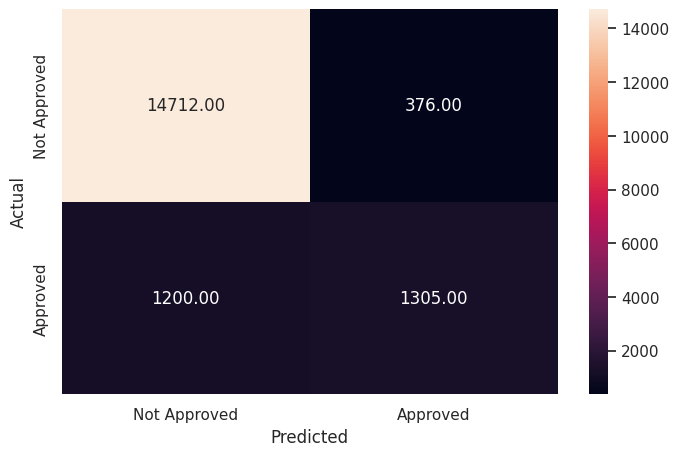

In [55]:
svm_test=model.predict(X_test_scaled)
metrics_score(y_test, svm_test)

our Linear Kernel SVM has a moderate drop in accuracy vs the RF model, but a significant drop in recall.

# **Model 4: RBF SVM**

In [56]:
#building the RBF SVM
svm = SVC(kernel="rbf",probability=True) 
model2 = svm.fit(X=X_train_scaled, y=y_train)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     35205
           1       0.78      0.52      0.63      5844

    accuracy                           0.91     41049
   macro avg       0.85      0.75      0.79     41049
weighted avg       0.90      0.91      0.90     41049



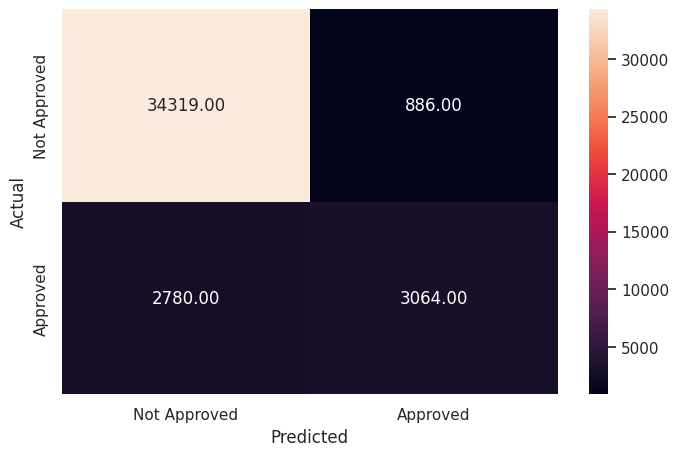

In [57]:
svm_rbf_train = model2.predict(X_train_scaled)
metrics_score(y_train, svm_train)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     15088
           1       0.90      0.60      0.72      2505

    accuracy                           0.93     17593
   macro avg       0.92      0.80      0.84     17593
weighted avg       0.93      0.93      0.93     17593



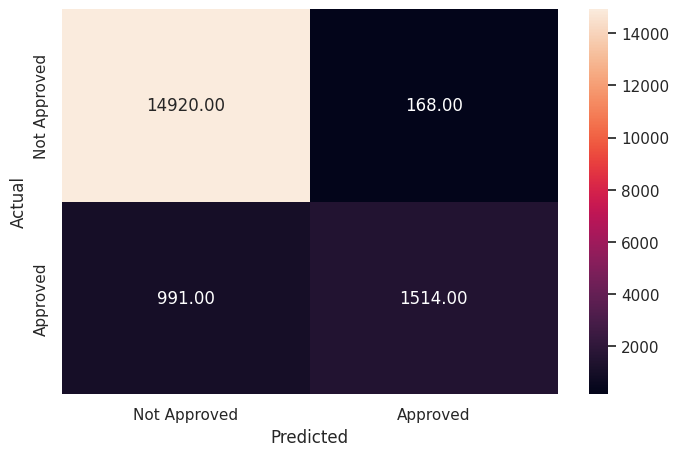

In [58]:
svm_rbf_test = model2.predict(X_test_scaled)
metrics_score(y_test, svm_rbf_test)

The RBF SVM has also demonstrated reduced performance relative to our RF model

# **Ensemble Models**

In [59]:
from sklearn.ensemble import (
    BaggingClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier

# **Model 5: Bagging Classifier**

In [60]:
#Building our Bagging Model
bag_est=BaggingClassifier(random_state=1)
bag_est.fit(X_train,y_train)

BaggingClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     35205
           1       1.00      0.95      0.97      5844

    accuracy                           0.99     41049
   macro avg       0.99      0.97      0.98     41049
weighted avg       0.99      0.99      0.99     41049



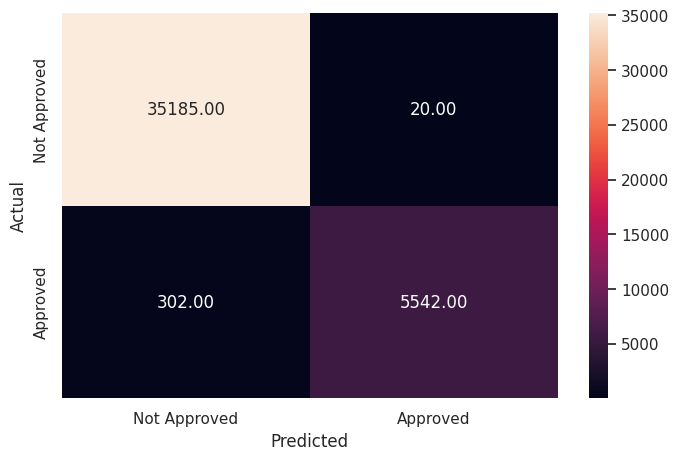

In [61]:
bag_est_train=bag_est.predict(X_train)
metrics_score(y_train, bag_est_train)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15088
           1       0.91      0.70      0.79      2505

    accuracy                           0.95     17593
   macro avg       0.93      0.84      0.88     17593
weighted avg       0.95      0.95      0.94     17593



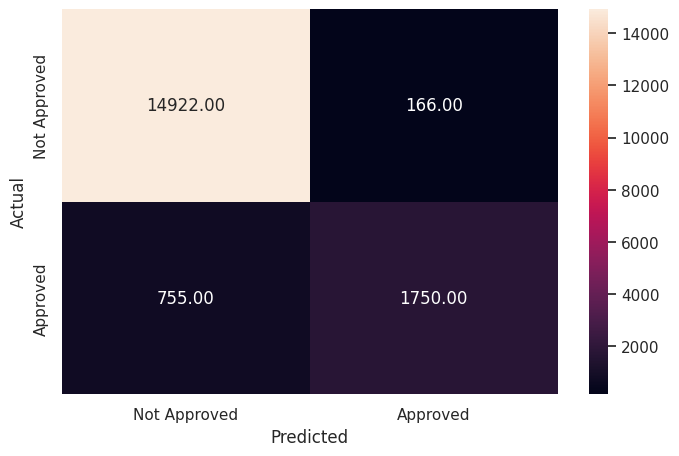

In [62]:
bag_est_test=bag_est.predict(X_test)
metrics_score(y_test, bag_est_test)

Our Bagging Classifier has increased our accuracy to 95% with a 70% recall value

# **Model 6: AdaBoost**

In [63]:
#Building our Ada Boost Model
ada_est=AdaBoostClassifier(random_state=1)
ada_est.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     35205
           1       0.81      0.63      0.71      5844

    accuracy                           0.93     41049
   macro avg       0.87      0.80      0.83     41049
weighted avg       0.92      0.93      0.92     41049



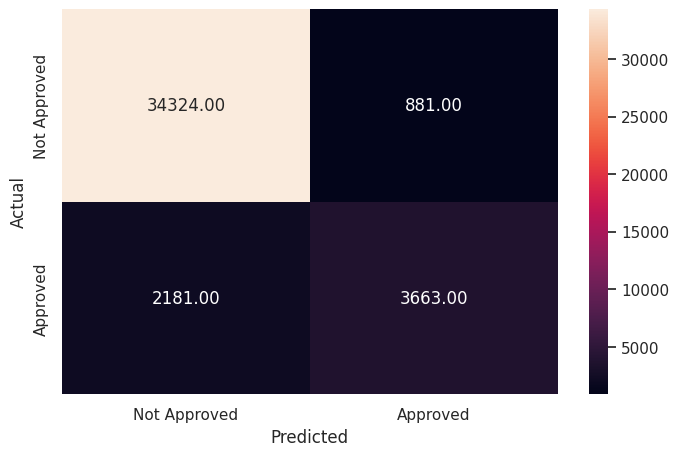

In [64]:
ada_est_train=ada_est.predict(X_train)
metrics_score(y_train, ada_est_train)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     15088
           1       0.81      0.62      0.70      2505

    accuracy                           0.93     17593
   macro avg       0.87      0.80      0.83     17593
weighted avg       0.92      0.93      0.92     17593



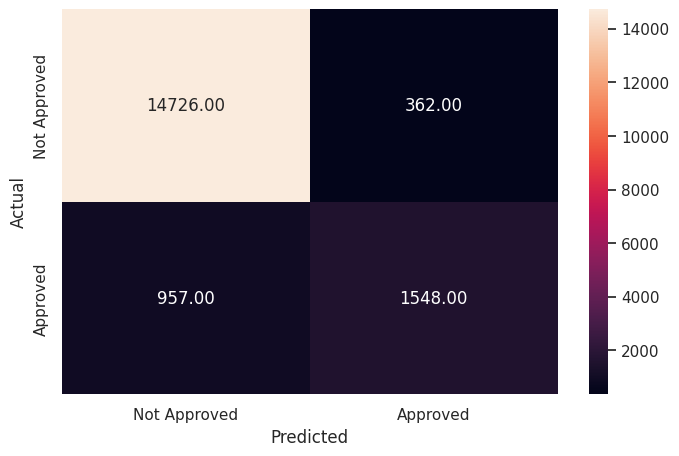

In [65]:
ada_est_test=ada_est.predict(X_test)
metrics_score(y_test, ada_est_test)

relative to our Bagging model, AdaBoost shows a drop in performance

# **Model 7: XGBoost Model**

In [66]:
xg_est = XGBClassifier(random_state=1)
xg_est.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     35205
           1       0.96      0.81      0.88      5844

    accuracy                           0.97     41049
   macro avg       0.97      0.90      0.93     41049
weighted avg       0.97      0.97      0.97     41049



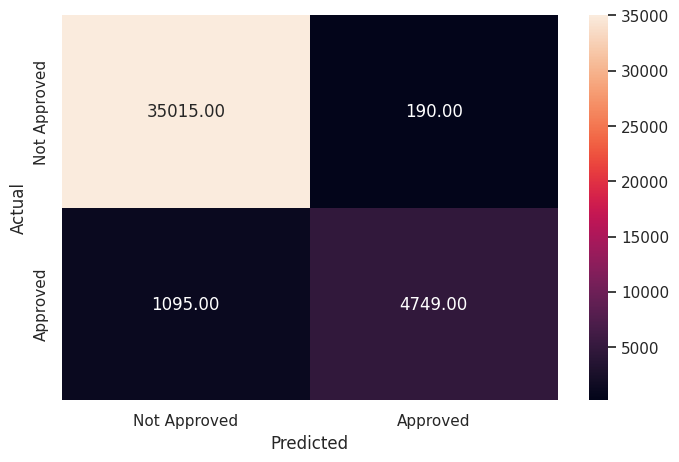

In [67]:
xg_est_train=xg_est.predict(X_train)
metrics_score(y_train, xg_est_train)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     15088
           1       0.91      0.73      0.81      2505

    accuracy                           0.95     17593
   macro avg       0.93      0.86      0.89     17593
weighted avg       0.95      0.95      0.95     17593



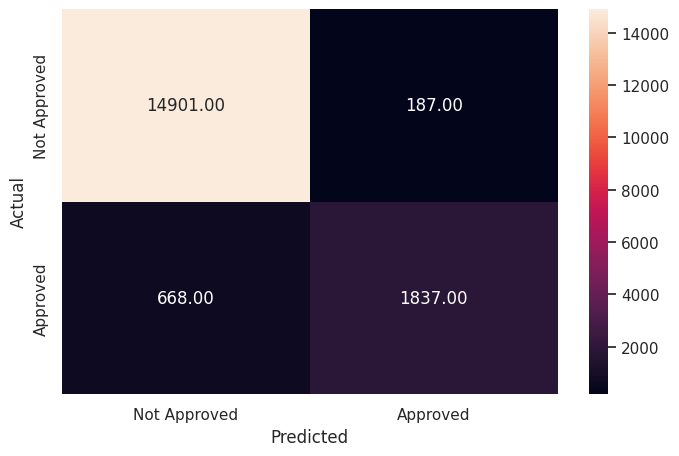

In [68]:
xg_est_test=xg_est.predict(X_test)
metrics_score(y_test, xg_est_test)

# **Tuning the XGBoost Model**

In [69]:
xg_tuned = XGBClassifier(random_state=1)

# Define the hyperparameter search space
parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}






scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(xg_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_fit = grid_obj
grid_fit.fit(X_train, y_train)
xg_tuned = grid_fit.best_estimator_
xg_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     35205
           1       0.95      0.79      0.87      5844

    accuracy                           0.97     41049
   macro avg       0.96      0.89      0.92     41049
weighted avg       0.96      0.97      0.96     41049



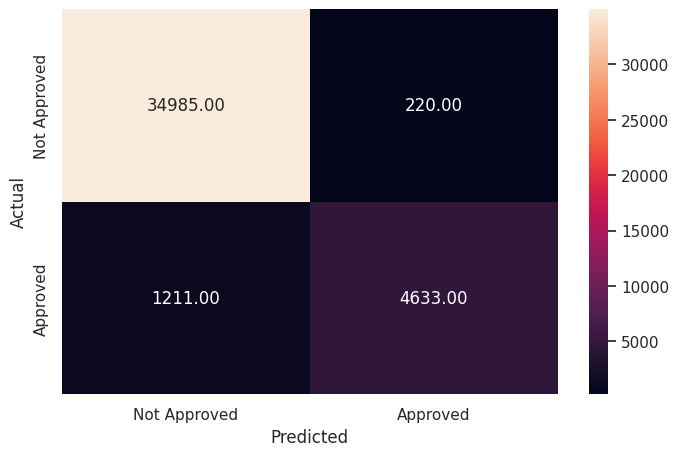

In [70]:
xg_tuned_train=xg_tuned.predict(X_train)
metrics_score(y_train, xg_tuned_train)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     15088
           1       0.92      0.73      0.81      2505

    accuracy                           0.95     17593
   macro avg       0.94      0.86      0.89     17593
weighted avg       0.95      0.95      0.95     17593



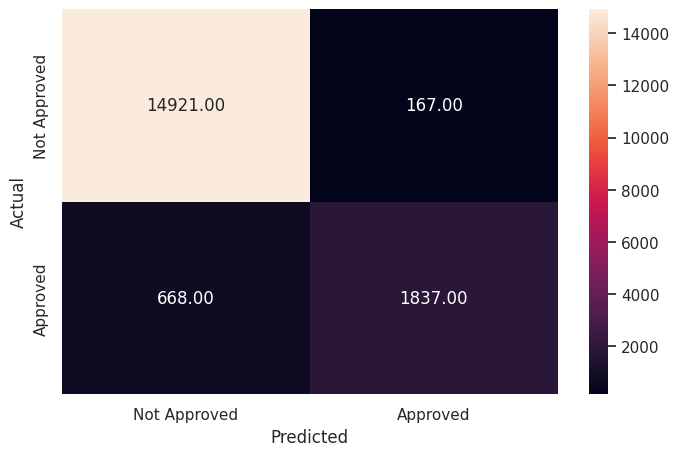

In [71]:
xg_tuned_test=xg_tuned.predict(X_test)
metrics_score(y_test, xg_tuned_test)

Evaluating our Tuned XGBoost Model on the Test data

In [73]:
df_encoded = pd.get_dummies(train_copy, columns=str_values, drop_first=True)

# Step 2: Separate features and target variable
X = df_encoded.drop(columns=['id', 'loan_status'])  # Drop 'id' and the target variable
y = df_encoded['loan_status']

# Step 3: Train the CatBoost model
xg_tuned = XGBClassifier(random_state=1)
xg_tuned.fit(X, y)

# Step 4: Prepare the test set similarly
test_copy_prep = pd.get_dummies(test_copy, columns=str_values, drop_first=True)
X_test_new = test_copy_prep.drop(columns=['id'])

# Align test data columns with the training data
X_test_new = X_test_new.reindex(columns=X.columns, fill_value=0)

# Step 5: Make predictions on the test set
y_pred_test = xg_tuned.predict(X_test_new)

# Step 6: Prepare the submission file
submission = pd.DataFrame({
    'id': test_copy['id'],
    'loan_status': y_pred_test
})

# Step 7: Save the submission file
submission.to_csv('submission.csv', index=False)

# **Reading and verifying the submission data**

In [75]:
sub=pd.read_csv('/kaggle/working/submission.csv')
sub.head()

,id,loan_status
0,58645,1
1,58646,0
2,58647,1
3,58648,0
4,58649,0
